# **Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

##### On commence par convertir le csv en sortie de médiapipe en un dataframe exploitable.

In [3]:
def conversion(csv):
    df = pd.read_csv(csv,delimiter=',')
    df.columns = ["movement",
	"WRIST_X",
	"WRIST_Y",
	"THUMB_CMC_X",
	"THUMB_CMC_Y",
	"THUMB_MCP_X",
	"THUMB_MCP_Y",
	"THUMB_IP_X",
	"THUMB_IP_Y",
	"THUMB_TIP_X",
	"THUMB_TIP_Y",
	"INDEX_FINGER_MCP_X",
	"INDEX_FINGER_MCP_Y",
	"iNDEX_FINGER_PIP_X",
	"iNDEX_FINGER_PIP_Y",
	"INDEX_FINGER_DIP_X",
	"INDEX_FINGER_DIP_Y",
	"INDEX_FINGER_TIP_X",
	"INDEX_FINGER_TIP_Y",
	"MIDDLE_FINGER_MCP_X",
	"MIDDLE_FINGER_MCP_Y",
	"MIDDLE_FINGER_PIP_X",
	"MIDDLE_FINGER_PIP_Y",
	"MIDDLE_FINGER_DIP_X",
	"MIDDLE_FINGER_DIP_Y",
	"MIDDLE_FINGER_TIP_X",
	"MIDDLE_FINGER_TIP_Y",
	"RING_FINGER_MCP_X"	,
	"RING_FINGER_MCP_Y"	,
	"RING_FINGER_PIP_X"	,
	"RING_FINGER_PIP_Y"	,
	"RING_FINGER_DIP_X"	,
	"RING_FINGER_DIP_Y"	,
	"RING_FINGER_TIP_X"	,
	"RING_FINGER_TIP_Y"	,
	"PINKY_FINGER_MCP_X",
	"PINKY_FINGER_MCP_Y",
	"PINKY_FINGER_PIP_X",
	"PINKY_FINGER_PIP_Y",
	"PINKY_FINGER_DIP_X",
	"PINKY_FINGER_DIP_Y",
	"PINKY_FINGER_TIP_X",
	"PINKY_FINGER_TIP_Y"
    ]
    return df

df = conversion('data/données25200.csv')


In [12]:
df

,movement,WRIST_X,WRIST_Y,THUMB_CMC_X,THUMB_CMC_Y,THUMB_MCP_X,THUMB_MCP_Y,THUMB_IP_X,THUMB_IP_Y,THUMB_TIP_X,...,RING_FINGER_TIP_X,RING_FINGER_TIP_Y,PINKY_FINGER_MCP_X,PINKY_FINGER_MCP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_DIP_X,PINKY_FINGER_DIP_Y,PINKY_FINGER_TIP_X,PINKY_FINGER_TIP_Y
0,0.0,0.0,0.0,-0.384106,-0.348069,-0.516556,-0.468093,-0.655629,-0.594119,-0.735099,...,-0.397351,-0.360072,-0.086093,-0.078016,-0.529801,-0.480096,-0.503311,-0.456091,-0.357616,-0.324065
1,0.0,0.0,0.0,-0.728040,-0.023990,-0.979088,-0.032262,-1.242688,-0.040948,-1.393317,...,-0.753144,-0.024817,-0.163181,-0.005377,-1.004193,-0.033090,-0.953983,-0.031435,-0.677830,-0.022335
2,0.0,-0.0,-0.0,0.032367,0.018416,0.043528,0.035157,0.055247,0.047434,0.061943,...,0.033483,0.048550,0.007255,0.068082,0.044644,0.068082,0.042412,0.051898,0.030135,0.045760
3,0.0,0.0,0.0,-0.363663,-0.218543,-0.489064,-0.417219,-0.620735,-0.562914,-0.695975,...,-0.376203,-0.576159,-0.081511,-0.807947,-0.501604,-0.807947,-0.476524,-0.615894,-0.338583,-0.543046
4,0.0,0.0,0.0,-0.841002,-0.788927,-1.131002,-1.060971,-1.435503,-1.346617,-1.609503,...,-0.870002,-0.816132,-0.188500,-0.176829,-1.160002,-1.088176,-1.102002,-1.033767,-0.783001,-0.734518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25194,15.0,0.0,0.0,-0.038396,-0.016245,-0.057594,-0.060548,-0.050210,-0.101898,-0.033966,...,0.001477,-0.208226,0.026582,-0.100421,0.026582,-0.135864,0.023628,-0.158015,0.020675,-0.178690
25195,15.0,-0.0,-0.0,0.025287,0.010698,0.037930,0.039875,0.033067,0.067108,0.022369,...,-0.000973,0.137133,-0.017506,0.066135,-0.017506,0.089477,-0.015561,0.104065,-0.013616,0.117681
25196,15.0,0.0,0.0,-0.077367,-0.032732,-0.116051,-0.122002,-0.101172,-0.205320,-0.068440,...,0.002976,-0.419567,0.053562,-0.202345,0.053562,-0.273760,0.047610,-0.318395,0.041659,-0.360054
25197,15.0,0.0,0.0,-0.176871,-0.164755,-0.265306,-0.247133,-0.231293,-0.215449,-0.156463,...,0.006803,0.006337,0.122449,0.114061,0.122449,0.114061,0.108844,0.101388,0.095238,0.088714


# **Data cleaning**

##### 1) Suppression des données manquantes ou dédoublées

In [13]:
df.dropna(axis=0)
df.drop_duplicates()

,movement,WRIST_X,WRIST_Y,THUMB_CMC_X,THUMB_CMC_Y,THUMB_MCP_X,THUMB_MCP_Y,THUMB_IP_X,THUMB_IP_Y,THUMB_TIP_X,...,RING_FINGER_TIP_X,RING_FINGER_TIP_Y,PINKY_FINGER_MCP_X,PINKY_FINGER_MCP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_DIP_X,PINKY_FINGER_DIP_Y,PINKY_FINGER_TIP_X,PINKY_FINGER_TIP_Y
0,0.0,0.0,0.0,-0.384106,-0.348069,-0.516556,-0.468093,-0.655629,-0.594119,-0.735099,...,-0.397351,-0.360072,-0.086093,-0.078016,-0.529801,-0.480096,-0.503311,-0.456091,-0.357616,-0.324065
1,0.0,0.0,0.0,-0.728040,-0.023990,-0.979088,-0.032262,-1.242688,-0.040948,-1.393317,...,-0.753144,-0.024817,-0.163181,-0.005377,-1.004193,-0.033090,-0.953983,-0.031435,-0.677830,-0.022335
2,0.0,-0.0,-0.0,0.032367,0.018416,0.043528,0.035157,0.055247,0.047434,0.061943,...,0.033483,0.048550,0.007255,0.068082,0.044644,0.068082,0.042412,0.051898,0.030135,0.045760
3,0.0,0.0,0.0,-0.363663,-0.218543,-0.489064,-0.417219,-0.620735,-0.562914,-0.695975,...,-0.376203,-0.576159,-0.081511,-0.807947,-0.501604,-0.807947,-0.476524,-0.615894,-0.338583,-0.543046
4,0.0,0.0,0.0,-0.841002,-0.788927,-1.131002,-1.060971,-1.435503,-1.346617,-1.609503,...,-0.870002,-0.816132,-0.188500,-0.176829,-1.160002,-1.088176,-1.102002,-1.033767,-0.783001,-0.734518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25194,15.0,0.0,0.0,-0.038396,-0.016245,-0.057594,-0.060548,-0.050210,-0.101898,-0.033966,...,0.001477,-0.208226,0.026582,-0.100421,0.026582,-0.135864,0.023628,-0.158015,0.020675,-0.178690
25195,15.0,-0.0,-0.0,0.025287,0.010698,0.037930,0.039875,0.033067,0.067108,0.022369,...,-0.000973,0.137133,-0.017506,0.066135,-0.017506,0.089477,-0.015561,0.104065,-0.013616,0.117681
25196,15.0,0.0,0.0,-0.077367,-0.032732,-0.116051,-0.122002,-0.101172,-0.205320,-0.068440,...,0.002976,-0.419567,0.053562,-0.202345,0.053562,-0.273760,0.047610,-0.318395,0.041659,-0.360054
25197,15.0,0.0,0.0,-0.176871,-0.164755,-0.265306,-0.247133,-0.231293,-0.215449,-0.156463,...,0.006803,0.006337,0.122449,0.114061,0.122449,0.114061,0.108844,0.101388,0.095238,0.088714


##### 2) Suppression des données aberrantes

In [14]:
# Calculate the IQR for each attribute
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold factor
threshold_factor = 3

# Identify outliers for each attribute
outliers = ((df < (Q1 - threshold_factor * IQR)) | (df > (Q3 + threshold_factor * IQR))).any(axis=1)
result = df[~outliers]

# Print the detected outliers
print(result)

       movement  WRIST_X  WRIST_Y  THUMB_CMC_X  THUMB_CMC_Y  THUMB_MCP_X  \
0           0.0      0.0      0.0    -0.384106    -0.348069    -0.516556   
1           0.0      0.0      0.0    -0.728040    -0.023990    -0.979088   
2           0.0     -0.0     -0.0     0.032367     0.018416     0.043528   
3           0.0      0.0      0.0    -0.363663    -0.218543    -0.489064   
5           0.0      0.0      0.0    -0.508587    -0.358044    -0.683961   
...         ...      ...      ...          ...          ...          ...   
25194      15.0      0.0      0.0    -0.038396    -0.016245    -0.057594   
25195      15.0     -0.0     -0.0     0.025287     0.010698     0.037930   
25196      15.0      0.0      0.0    -0.077367    -0.032732    -0.116051   
25197      15.0      0.0      0.0    -0.176871    -0.164755    -0.265306   
25198      15.0      0.0      0.0    -0.010531    -0.004492    -0.015796   

       THUMB_MCP_Y  THUMB_IP_X  THUMB_IP_Y  THUMB_TIP_X  ...  \
0        -0.468093   -0

##### 3) On vérifie que le dataset est équilibré

In [15]:
L =[]
for i in range(16):
    L.append(result[result['movement']==i].shape[0])
print(L)

[1536, 1379, 1575, 1575, 1535, 1575, 1064, 1568, 1265, 854, 1560, 1575, 1575, 1573, 1534, 1575]


##### 4) Si l'une des classes est sous-représentée, on échantillone notre dataset de sorte à le réequilibrer et qu'il n'y ait pas de classe minoritaire

In [16]:
k = L.index(min(L))
df_list = []
for i in range(16):
    if i != k:
        random_sample = result[result['movement']==i].sample(n=min(L),random_state=0)
        df_list.append(random_sample)
clean_df = pd.concat(df_list,ignore_index=True)
clean_df


,movement,WRIST_X,WRIST_Y,THUMB_CMC_X,THUMB_CMC_Y,THUMB_MCP_X,THUMB_MCP_Y,THUMB_IP_X,THUMB_IP_Y,THUMB_TIP_X,...,RING_FINGER_TIP_X,RING_FINGER_TIP_Y,PINKY_FINGER_MCP_X,PINKY_FINGER_MCP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_DIP_X,PINKY_FINGER_DIP_Y,PINKY_FINGER_TIP_X,PINKY_FINGER_TIP_Y
0,0.0,0.0,0.0,-0.465088,-0.158239,-0.668564,-0.227468,-0.833282,-0.283511,-0.823593,...,-0.455399,-0.154942,-0.048447,-0.016483,-0.639496,-0.217578,-0.600738,-0.204392,-0.397263,-0.135162
1,0.0,0.0,0.0,-0.747592,-0.474434,-1.035128,-0.934491,-1.250780,-1.178896,-1.250780,...,-0.575071,-1.250780,-0.043130,-1.768344,-0.891360,-1.682083,-0.833853,-1.279533,-0.488810,-1.178896
2,0.0,0.0,0.0,-0.222105,0.059829,-0.310182,0.083555,-0.375282,0.101091,-0.405917,...,-0.202958,0.054672,-0.034465,0.009284,-0.314011,0.084586,-0.268058,0.072208,-0.160835,0.043325
3,0.0,0.0,0.0,-0.188038,0.051645,-0.242471,0.066595,-0.296903,0.081546,-0.326593,...,-0.163297,0.044850,-0.024742,0.006795,-0.252367,0.069314,-0.227625,0.062518,-0.143503,0.039414
4,0.0,0.0,0.0,-0.323741,-0.237410,-0.474820,-0.474820,-0.589928,-0.647482,-0.553957,...,-0.294964,-0.625899,-0.028777,-0.841727,-0.424460,-0.942446,-0.446043,-0.748201,-0.309353,-0.625899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,15.0,0.0,0.0,-0.099865,0.085265,-0.135714,0.115873,-0.051213,0.043726,0.043531,...,0.046092,-0.039353,0.107547,-0.091824,0.117790,-0.100569,0.117790,-0.100569,0.112668,-0.096196
12806,15.0,0.0,0.0,-0.101487,0.094113,-0.154768,0.143522,-0.081190,0.075290,0.005074,...,-0.025372,0.023528,0.063429,-0.058820,0.083727,-0.077643,0.093876,-0.087054,0.101487,-0.094113
12807,15.0,0.0,0.0,-0.138554,-0.098124,-0.210843,-0.149319,-0.105422,-0.074660,0.024096,...,-0.078313,-0.055461,0.087349,0.061861,0.090361,0.063994,0.081325,0.057595,0.075301,0.053328
12808,15.0,0.0,0.0,-0.319031,-0.181071,-0.517347,-0.525969,-0.327653,-0.836378,-0.086224,...,-0.232806,-2.026276,0.137959,-1.017449,0.129337,-1.345102,0.129337,-1.534796,0.120714,-1.698623


In [18]:
clean_df.to_csv('data/cleandata1.csv', index=False,header=False)

In [30]:
def clean_data(df):
    df.dropna(axis=0)
    df.drop_duplicates()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    threshold_factor = 3
    outliers = ((df < (Q1 - threshold_factor * IQR)) | (df > (Q3 + threshold_factor * IQR))).any(axis=1)
    result = df[~outliers]
    L =[]
    for i in range(16):
        L.append(result[result['movement']==i].shape[0])
    k = L.index(min(L))
    for i in range(16):
        if i != k:
            random_sample = result[result['movement']==i].sample(n=min(L),random_state=0)
            df_list.append(random_sample)
    clean_df = pd.concat(df_list,ignore_index=True)
    return clean_df
      

# **Sélection et entraînement du modèle**

##### On crée deux listes : X_train, qui correspond aux coordonnées des mouvements enregistrés, et y_train, qui correspond à la labellisation de ces données (c'est la classe dans notre problème de classification).

In [19]:
df_fingers_position = clean_df[["WRIST_X","WRIST_Y","THUMB_CMC_X","THUMB_CMC_Y","THUMB_MCP_X","THUMB_MCP_Y","THUMB_IP_X","THUMB_IP_Y","THUMB_TIP_X","THUMB_TIP_Y","INDEX_FINGER_MCP_X","INDEX_FINGER_MCP_Y","iNDEX_FINGER_PIP_X","iNDEX_FINGER_PIP_Y","INDEX_FINGER_DIP_X","INDEX_FINGER_DIP_Y","INDEX_FINGER_TIP_X","INDEX_FINGER_TIP_Y","MIDDLE_FINGER_MCP_X","MIDDLE_FINGER_MCP_Y","MIDDLE_FINGER_PIP_X","MIDDLE_FINGER_PIP_Y","MIDDLE_FINGER_DIP_X","MIDDLE_FINGER_DIP_Y","MIDDLE_FINGER_TIP_X","MIDDLE_FINGER_TIP_Y","RING_FINGER_MCP_X"	,"RING_FINGER_MCP_Y","RING_FINGER_PIP_X","RING_FINGER_PIP_Y","RING_FINGER_DIP_X","RING_FINGER_DIP_Y"	,"RING_FINGER_TIP_X","RING_FINGER_TIP_Y","PINKY_FINGER_MCP_X","PINKY_FINGER_MCP_Y","PINKY_FINGER_PIP_X","PINKY_FINGER_PIP_Y","PINKY_FINGER_DIP_X","PINKY_FINGER_DIP_Y","PINKY_FINGER_TIP_X","PINKY_FINGER_TIP_Y"]]	
X=np.asarray(df_fingers_position)
y=np.asarray(clean_df['movement'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18653, 42), (4664, 42), (18653,), (4664,))

##### On fit un modèle Random Forest sur nos données d'entraînement

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=150)
rf_classifier = rf_classifier.fit(X_train,y_train)

# **Optimisation du modèle**

##### On veut savoir à présent quelle complexité utiliser pour notre modèle Random Forest, c'est à dire le nombre d'arbres de décision à utiliser, afin d'éviter l'overfitting ou l'underfitting. Pour cela on trace l'erreur quadratique moyenne en fonction du nombre d'arbre de décision.

In [51]:
def model_complexity(X,y):
    #df = conversion(csv)
    #df_fingers_position = df[["WRIST_X","WRIST_Y","THUMB_CMC_X","THUMB_CMC_Y","THUMB_MCP_X","THUMB_MCP_Y","THUMB_IP_X","THUMB_IP_Y","THUMB_TIP_X","THUMB_TIP_Y","INDEX_FINGER_MCP_X","INDEX_FINGER_MCP_Y","iNDEX_FINGER_PIP_X","iNDEX_FINGER_PIP_Y","INDEX_FINGER_DIP_X","INDEX_FINGER_DIP_Y","INDEX_FINGER_TIP_X","INDEX_FINGER_TIP_Y","MIDDLE_FINGER_MCP_X","MIDDLE_FINGER_MCP_Y","MIDDLE_FINGER_PIP_X","MIDDLE_FINGER_PIP_Y","MIDDLE_FINGER_DIP_X","MIDDLE_FINGER_DIP_Y","MIDDLE_FINGER_TIP_X","MIDDLE_FINGER_TIP_Y","RING_FINGER_MCP_X"	,"RING_FINGER_MCP_Y","RING_FINGER_PIP_X","RING_FINGER_PIP_Y","RING_FINGER_DIP_X","RING_FINGER_DIP_Y"	,"RING_FINGER_TIP_X","RING_FINGER_TIP_Y","PINKY_FINGER_MCP_X","PINKY_FINGER_MCP_Y","PINKY_FINGER_PIP_X","PINKY_FINGER_PIP_Y","PINKY_FINGER_DIP_X","PINKY_FINGER_DIP_Y","PINKY_FINGER_TIP_X","PINKY_FINGER_TIP_Y"]]
    cv = KFold(5,random_state=0,shuffle=True)
    mse_scores = []
    n_estimators_values = [50, 100, 150, 200]
    for n in n_estimators_values:
        mse_scores.append(-np.mean(cross_val_score(RandomForestClassifier(n_estimators=n),X,y,cv=cv,scoring='neg_mean_squared_error')))
    plt.figure()
    plt.plot(n_estimators_values, mse_scores, marker='o')
    plt.xlabel('n_estimators')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Cross-Validated MSE for Random Forest')
    plt.show()

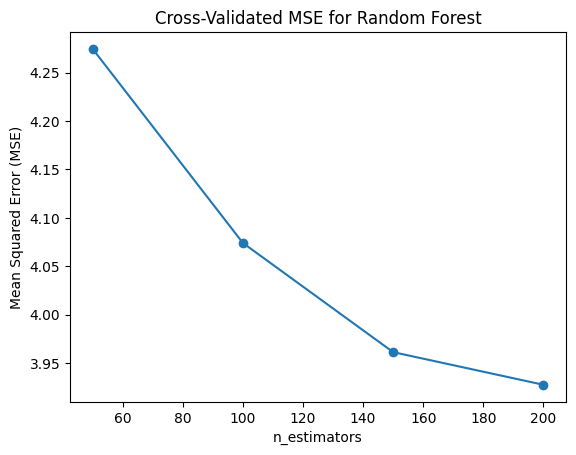

None


In [52]:
print(model_complexity(X_train,y_train))

##### On choisit le n_estimator qui minimise l'erreur quadratique moyenne.

# **Validation croisée**

##### On veut à présent évaluer la performance de notre modèle. Pour cela on utilise la validation croisée et on calcule l'accuracy, la précision, le recall et le f1 score.

In [45]:
from sklearn.model_selection import cross_validate
def cross_validation_modele(X,y):
    cv = KFold(5,random_state=0,shuffle=True)
    scoring_metrics = ['accuracy','precision_macro','recall_macro','f1_macro']
    scores = cross_validate(rf_classifier,X,y,cv=cv,scoring=scoring_metrics)
    accuracy_rf = np.mean(scores['test_accuracy'])
    precision_rf = np.mean(scores['test_precision_macro'])
    recall_rf = np.mean(scores['test_recall_macro'])
    f1_rf = np.mean(scores['test_f1_macro'])
    return accuracy_rf,precision_rf,recall_rf,f1_rf


In [46]:
liste_score = cross_validation_modele(X_train,y_train)

print("accuracy = " + str(liste_score[0]) + "  precision = " + str(liste_score[1]) + "  recall = " + str(liste_score[2]) + "  f1_score = " + str(liste_score[3]))

accuracy = 0.9253508076515612  precision = 0.9257059419475263  recall = 0.9255322085630647  f1_score = 0.9251568769802192


# **Détermination de la taille du dataset**
##### L'algorithme de data augmentation permet d'augmenter la taille de notre dataset jusqu'à une taille N souhaitée. On s'intéresse ici au choix de N, pour cela on trace l'erreur quadratique moyenne en fonction de la taille N des données.

In [108]:
# Code à compléter, permet de comparer l'erreur quadratique moyenne de plusieurs csv
def data_size(L):
    data_list=[]
    shape_list=[]
    for csv in range(len(L)):
        shape_list.append(conversion(csv).shape[0])
        data_list.append(clean_data(conversion(csv)))
    mse_scores = []
    for dataset in data_list:
        df_fingers_position = dataset[["WRIST_X","WRIST_Y","THUMB_CMC_X","THUMB_CMC_Y","THUMB_MCP_X","THUMB_MCP_Y","THUMB_IP_X","THUMB_IP_Y","THUMB_TIP_X","THUMB_TIP_Y","INDEX_FINGER_MCP_X","INDEX_FINGER_MCP_Y","iNDEX_FINGER_PIP_X","iNDEX_FINGER_PIP_Y","INDEX_FINGER_DIP_X","INDEX_FINGER_DIP_Y","INDEX_FINGER_TIP_X","INDEX_FINGER_TIP_Y","MIDDLE_FINGER_MCP_X","MIDDLE_FINGER_MCP_Y","MIDDLE_FINGER_PIP_X","MIDDLE_FINGER_PIP_Y","MIDDLE_FINGER_DIP_X","MIDDLE_FINGER_DIP_Y","MIDDLE_FINGER_TIP_X","MIDDLE_FINGER_TIP_Y","RING_FINGER_MCP_X"	,"RING_FINGER_MCP_Y","RING_FINGER_PIP_X","RING_FINGER_PIP_Y","RING_FINGER_DIP_X","RING_FINGER_DIP_Y"	,"RING_FINGER_TIP_X","RING_FINGER_TIP_Y","PINKY_FINGER_MCP_X","PINKY_FINGER_MCP_Y","PINKY_FINGER_PIP_X","PINKY_FINGER_PIP_Y","PINKY_FINGER_DIP_X","PINKY_FINGER_DIP_Y","PINKY_FINGER_TIP_X","PINKY_FINGER_TIP_Y"]]
        X = np.asarray(df_fingers_position)
        y = np.asarray(dataset['movement'])
        cv = KFold(5,random_state=0,shuffle=True)
        mse_scores.append(-np.mean(cross_val_score(RandomForestClassifier(n_estimators=100),X,y,cv=cv,scoring='neg_mean_squared_error')))
    plt.figure()
    plt.plot(shape_list, mse_scores, marker='o')
    plt.xlabel('Size of the data generated')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Cross-Validated MSE for different sizes of data generated')
    plt.show()

    # print data_size(met une liste de csv à comparer ici), fait attention à la taille de la liste le temps de calcul peut être trop long

# **Tests**

##### On teste notre modèle sur un ensemble de données réelles jamais vu avant.

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def classification_rf(X_test_rf,y_true):
    y_pred = rf_classifier.predict(X_test_rf)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='macro')
    recall = recall_score(y_true, y_pred,average='macro')
    f1 = f1_score(y_true, y_pred,average='macro')
    return accuracy,precision,recall,f1

liste = classification_rf(X_test,y_test)
print("accuracy = " + str(liste[0]) + "  precision = " + str(liste[1]) + "  recall = " + str(liste[2]) + "  f1_score = " + str(liste[3]))

accuracy = 0.9316939890710383  precision = 0.9328182939415314  recall = 0.931388785574402  f1_score = 0.931412231077293


##### On test le modèle sur les données réelles et on génère une matrice de confusion

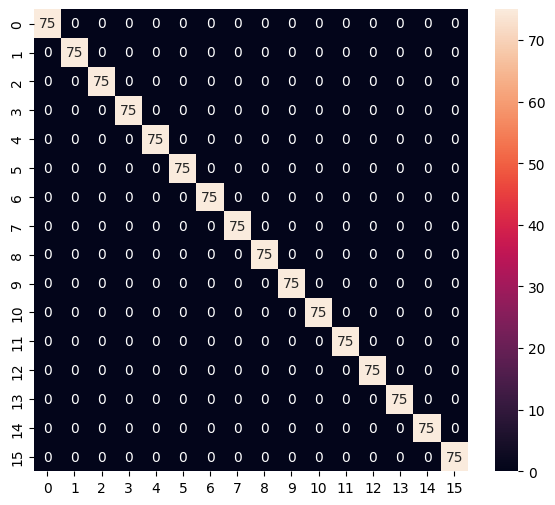

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75
           4       1.00      1.00      1.00        75
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        75
          10       1.00      1.00      1.00        75
          11       1.00      1.00      1.00        75
          12       1.00      1.00      1.00        75
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        75
          15       1.00      1.00      1.00        75

    accuracy                           1.00      1200
   m

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

dataset = 'data/donnees_reelles.csv'
X_test = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_test = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = rf_classifier.predict(X_test)
print_confusion_matrix(y_test, Y_pred)